# Graduate Admissions Data Set
dataset and context found here: 
https://www.kaggle.com/ashwathbalaji/graduate-admissions-amazing-insights 
https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8
https://www.kaggle.com/mohansacharya/graduate-admissions
## Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

## Content
The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )

## Acknowledgements
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format. The dataset is owned by Mohan S Acharya.

## Inspiration
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

## Citation
Please cite the following if you are interested in using the dataset : Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

I would like to thank all of you for contributing to this dataset through discussions and questions. I am in awe of the number of kernels built on this dataset. Some results and visualisations are fantastic and makes me a proud owner of the dataset. Keep em' coming! Thank You.

In [2]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

import warnings
import statistics as st
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# read csv dataset into an object
data = pd.read_csv("data/graduate-admissions/Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
print('Number of Rows & Columns: ' , data.shape)

Number of Rows & Columns:  (400, 9)


In [5]:
data.describe().T[1:7]

,count,mean,std,min,25%,50%,75%,max
GRE Score,400.0,316.807500,11.473646,290.0,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.0,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.0,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.0,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.0,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.8,8.17,8.61,9.0625,9.92


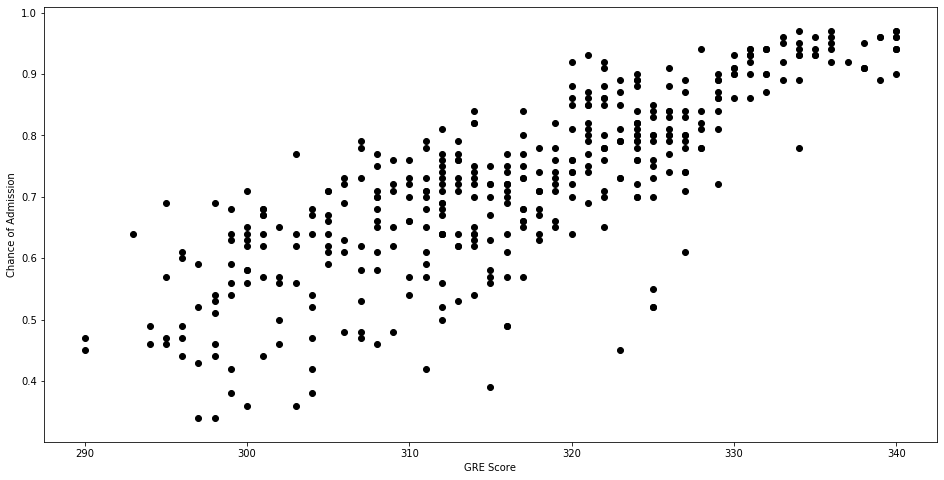

In [6]:
# declare variables to represent the column names
chanceOfAdmitColumn = 'Chance of Admit '
greScoreColumn = 'GRE Score'

# create and show the scatter plot of gre score vs. chance of admission

plt.figure(figsize=(16, 8))
plt.scatter(
    data[greScoreColumn],
    data[chanceOfAdmitColumn],
    c='black'
)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.show()

In [7]:
# get the linear regression best fit line

X = data[greScoreColumn].values.reshape(-1,1)
Y = data[chanceOfAdmitColumn].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, Y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = -2.4361 + 0.0099759X


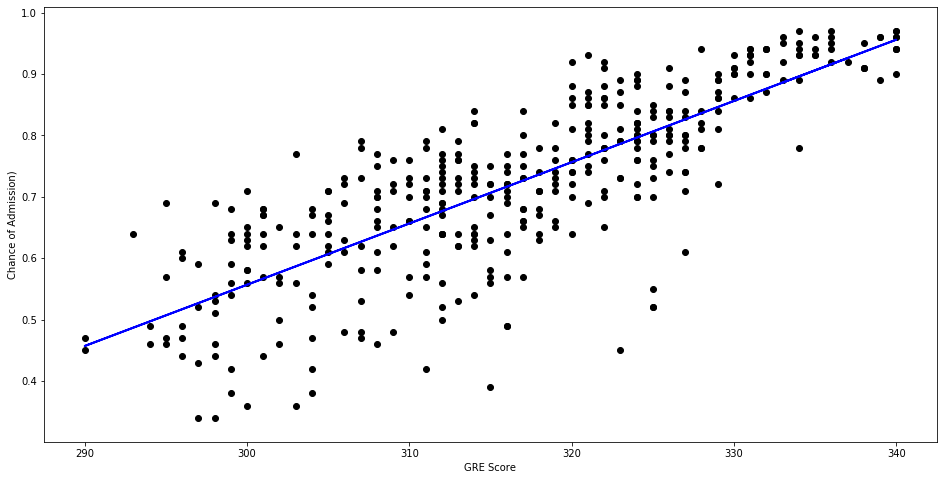

In [8]:

predictions = reg.predict(X)

# create the scatter plot again
plt.figure(figsize=(16, 8))
plt.scatter(
    data[greScoreColumn],
    data[chanceOfAdmitColumn],
    c='black'
)

# add the best fit line ontop of the scatter plot

plt.plot(
    data[greScoreColumn],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission)")
plt.show()

In [9]:
# print summary about the linear regression relationship. 

X = data[greScoreColumn]
y = data[chanceOfAdmitColumn]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     720.6
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.46e-91
Time:                        07:35:04   Log-Likelihood:                 418.65
No. Observations:                 400   AIC:                            -833.3
Df Residuals:                     398   BIC:                            -825.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4361      0.118    -20.677      0.0

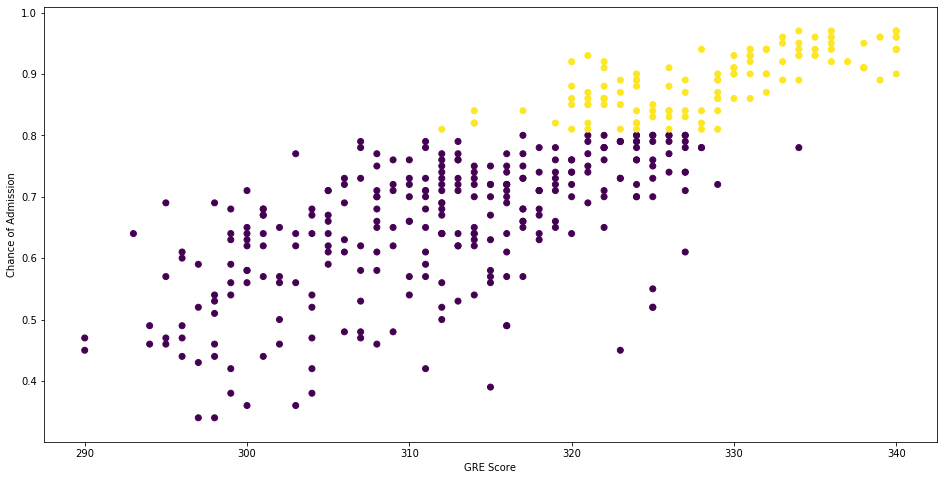

In [10]:
#Label 1 if x>0.80 and 0 if x<=0.80

# we are adding a new column to the data set
admitThreshholdColumn = 'ChanceAdmit'
data[admitThreshholdColumn] = data[chanceOfAdmitColumn].map(lambda x : 1 if x>0.80 else 0)

plt.figure(figsize=(16, 8))
plt.scatter(
    data[greScoreColumn],
    data[chanceOfAdmitColumn],
    c=data[admitThreshholdColumn]
)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.show()

In [11]:
# multiple linear regression

Xs = data.drop(['Serial No.','Chance of Admit ', 'ChanceAdmit'], axis=1)
y = data[chanceOfAdmitColumn].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xs, y)
print("The linear model is: Y = {:.5} + {:.5}*GRE Score + {:.5}*TOEFL Score + {:.5}*University Rating + + {:.5}*SOP + {:.5}*LOR + {:.5}*CGPA + {:.5}*Research".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2], reg.coef_[0][3], reg.coef_[0][4], reg.coef_[0][5], reg.coef_[0][6]))

The linear model is: Y = -1.2594 + 0.0017374*GRE Score + 0.0029196*TOEFL Score + 0.0057167*University Rating + + -0.0033052*SOP + 0.022353*LOR + 0.11894*CGPA + 0.024525*Research


### Determine if there is a strong correlation with the variables


In [12]:
X = np.column_stack((data['GRE Score'], data['TOEFL Score'],  data['University Rating'], data['SOP'], data['LOR '], data['CGPA'], data['Research']))
y = data['Chance of Admit ']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):          3.12e-134
Time:                        07:35:06   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2594      0.125    -10.097      0.0

### Results of the summary

R-squared value is 0.803 which indicates a very high relationship
F-statistic value is 228.9 which is much higher than 1, indicating a strong correlation

we can look at our P values to determine which variables were significant or not to our model. it appears that the only value that was high was the variable corresponding with x6. 

x3 and x4 have high P values. this indicates that they are not strongly correlated with our Y value, chance of admission.

# Additional Questions that can be answered via analysis
Does GRE score influence the chance of getting admitted ? ...Yes!

How does the University Rating correlate with the chance of getting admitted?

Does CGPA correlate with University Rating?

Does TOEFL score correlate with the chance of getting admitted?

In [13]:
# add any new code here!, or edit the above cells!